In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols =["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0  216.0021    8.7967  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"]=(df["class"]=="g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0  216.0021    8.7967  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

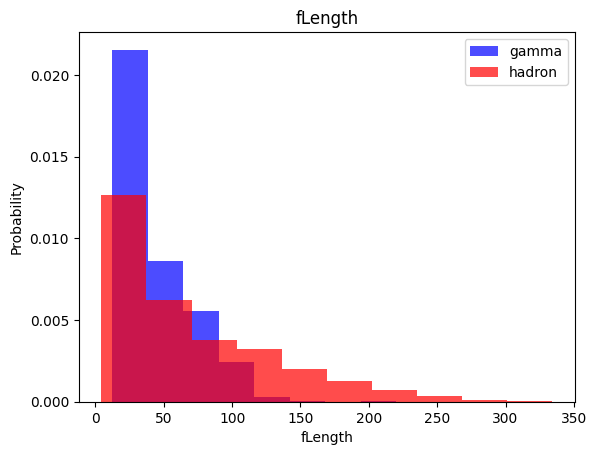

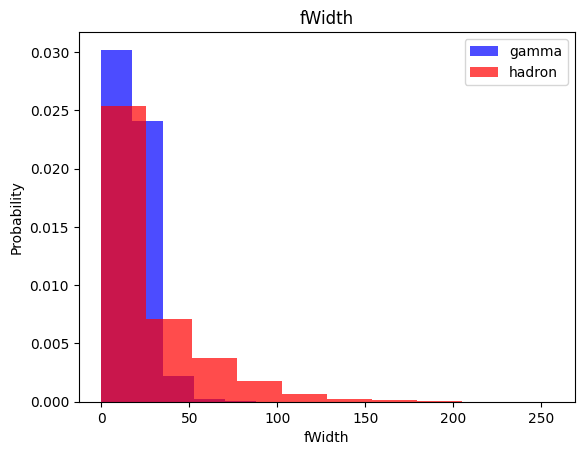

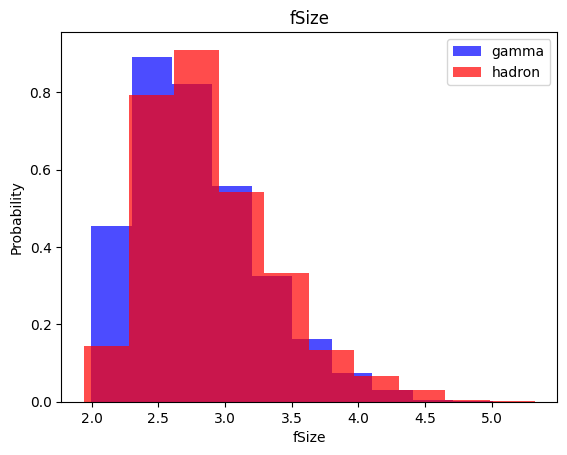

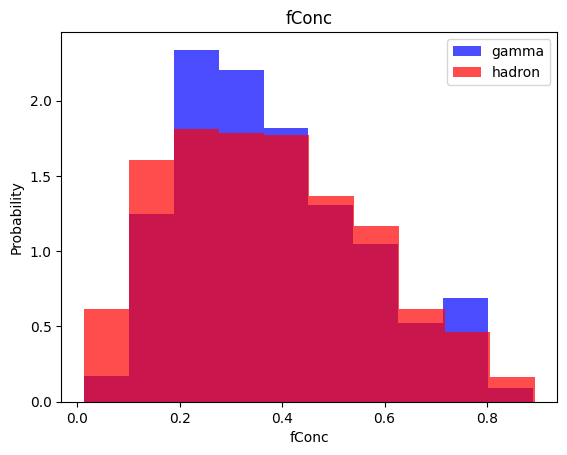

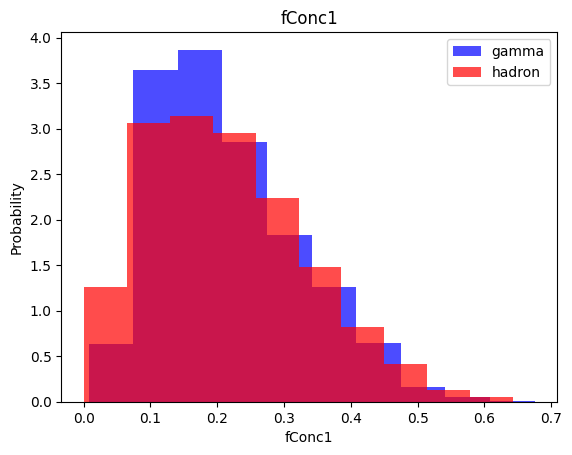

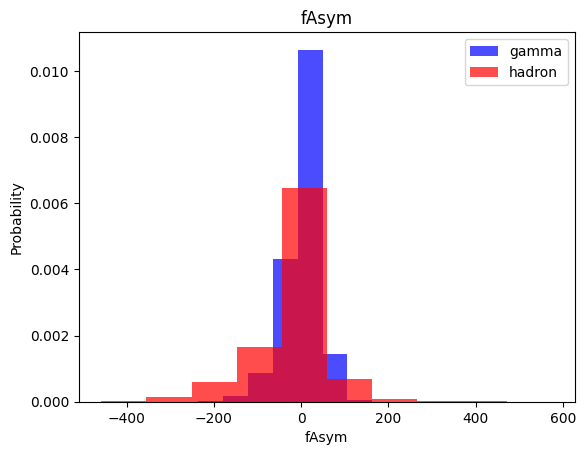

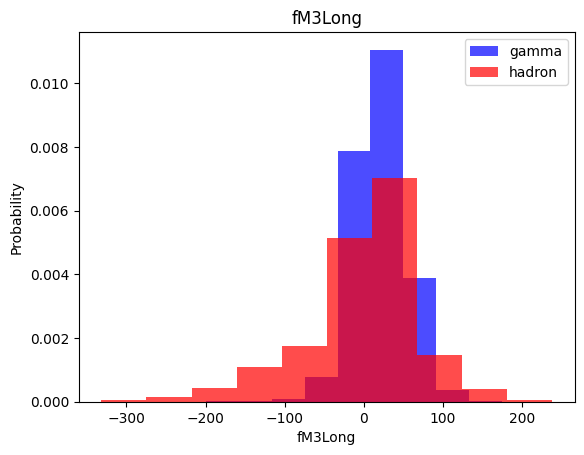

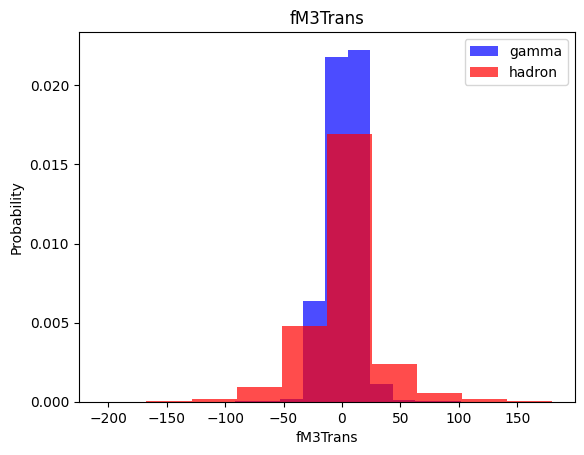

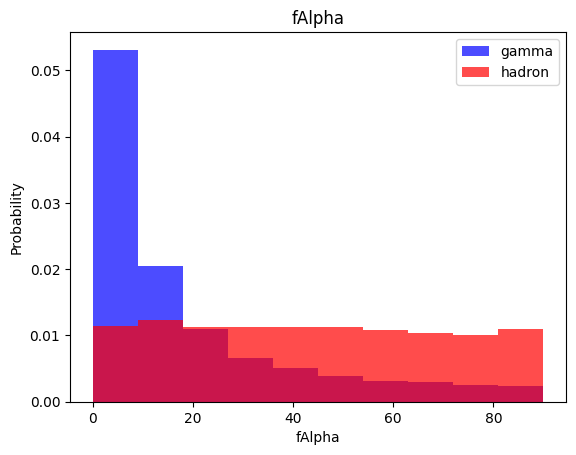

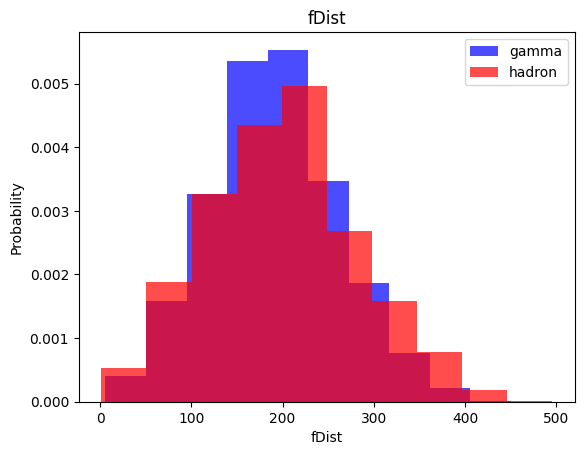

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label], color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Train,validation,Test

In [6]:
print(len(df["class"]==1)) # gamma
print(len(df["class"]==0))

19020
19020


These values where 7419 and 3993 respectively so we oversampled them

In [7]:
train, valid, test = np.split(df.sample(frac=1).values, [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(data_array, oversample=False):
  X = data_array[:,:-1]
  y = data_array[:,-1]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [9]:
train_data, X_train, y_train = scale_dataset(train, oversample=True) 
valid_data, X_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, X_test, y_test = scale_dataset(test, oversample=False)

# kNN (k-nearest Neighbours)

This model works on shortest distance from a point.<br>
Used for Supervidsed learning(Classification & Regression)<br>
1. Choose k(no. of nearest neighbour to check) <br>
2. Calculate Distance(Euclidean Diatance)<br>
3. Find Neighbour sort them<br>
4. Vote and assigned <br>

Small K - High sensitivity to noise --> Overfitting<br>
Large K - Smooth decision --> Underfitting<br>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      1383
         1.0       0.84      0.85      0.85      2421

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [15]:
y_pred = nb_model.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.39      0.49      1383
         1.0       0.72      0.90      0.80      2421

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Log Regression

It is a supervised Learning<br>
Uses Sigmoid function and gives output in probability between 0 to 1<br>
Works well with linear data<br>
Used for - 
1. Spam detection
2. Disease prediction 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70      1383
         1.0       0.83      0.83      0.83      2421

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# SVM (Support Vector Machine)

It is a supervised learning<br>
Used for classififcation and regression <br>
Finds an optimal seperating hyperplane between two state / data<br>
Maximaize the margin between the classes i.e Output<br>
Types of SVM -
1. Linear SVM
2. Non-linear SVM
Used for -
1. Text classification
2. Face recognition
3. Bioinformatics
4. Spam detection

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1383
         1.0       0.88      0.91      0.89      2421

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [23]:
import tensorflow as tf

In [24]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'],label='')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

1. validation_split = 0.2<br>
splits 20% of training data for validation  <br>
2. lr = learning rate<br>
3. Dropout(dropout_prob)<br>
drop the random nodes of NN, so that the model dont memorize the pattern instead learn from data

In [25]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )

    return nn_model,history

### 'inf' is positive infinity
### evalute() function
It uses the X_valid & y_valid to find the accuracy and loss<br>
"model.evaluate(X_valid,y_valid)[0]" here '0' stands for loss<br>
"model.evaluate(X_valid,y_valid)[1] here '1' stands for accuracy



16 nodes , dropout 0 , learning rate 0.01 , batch size 32


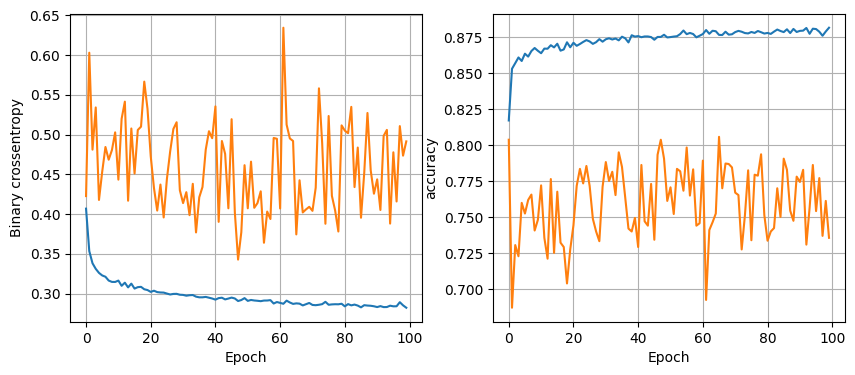

119/119 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8670
16 nodes , dropout 0 , learning rate 0.01 , batch size 64


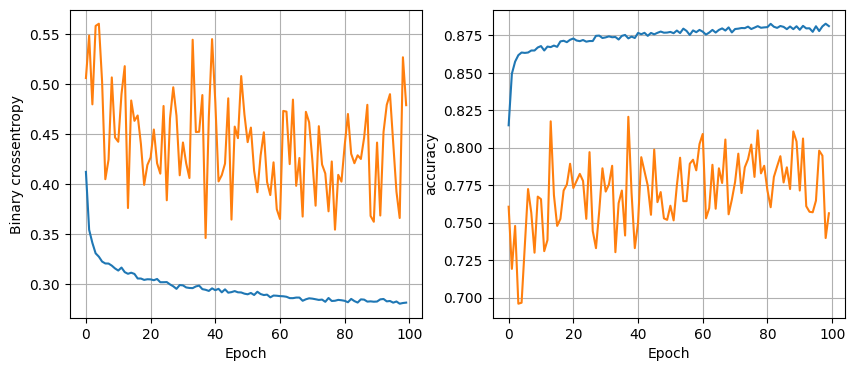

119/119 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8728
16 nodes , dropout 0 , learning rate 0.01 , batch size 128


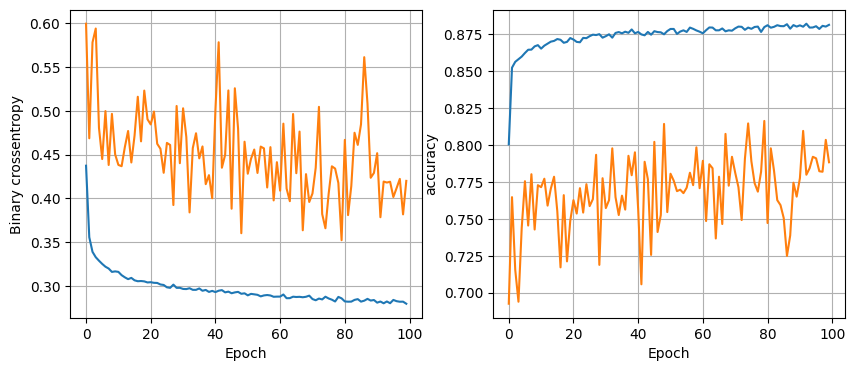

119/119 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8801
16 nodes , dropout 0 , learning rate 0.005 , batch size 32


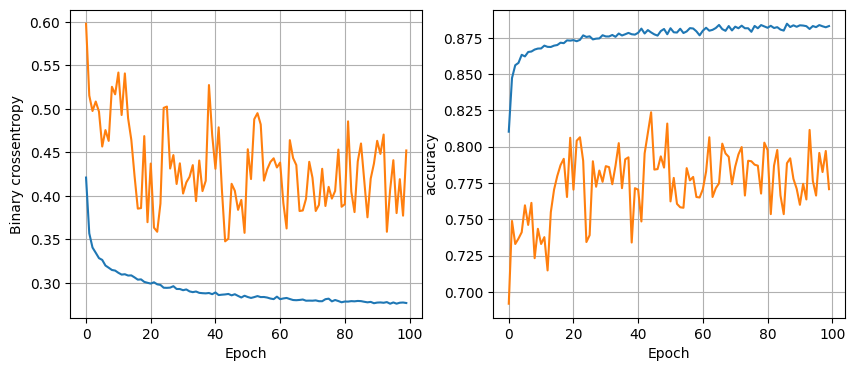

119/119 [==============================] - 0s 969us/step - loss: 0.3056 - accuracy: 0.8762
16 nodes , dropout 0 , learning rate 0.005 , batch size 64


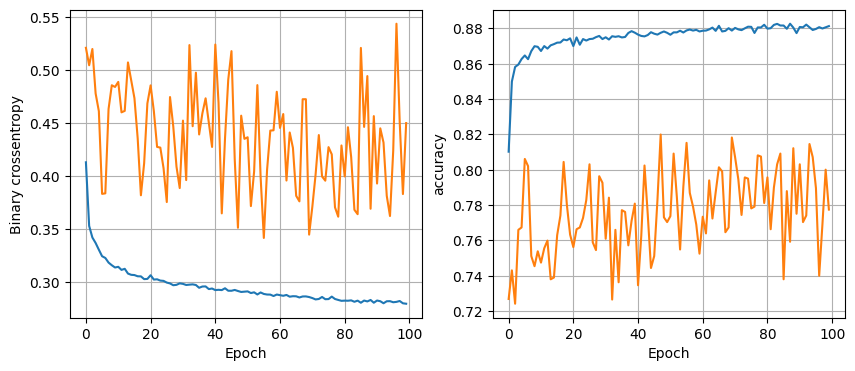

119/119 [==============================] - 0s 973us/step - loss: 0.3080 - accuracy: 0.8725
16 nodes , dropout 0 , learning rate 0.005 , batch size 128


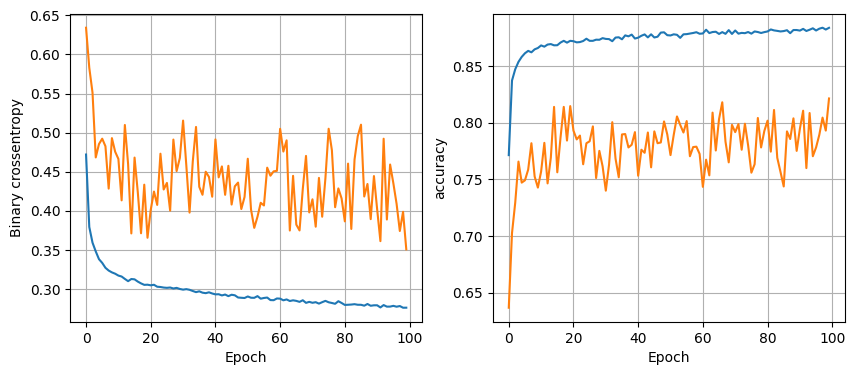

119/119 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.8746
16 nodes , dropout 0 , learning rate 0.001 , batch size 32


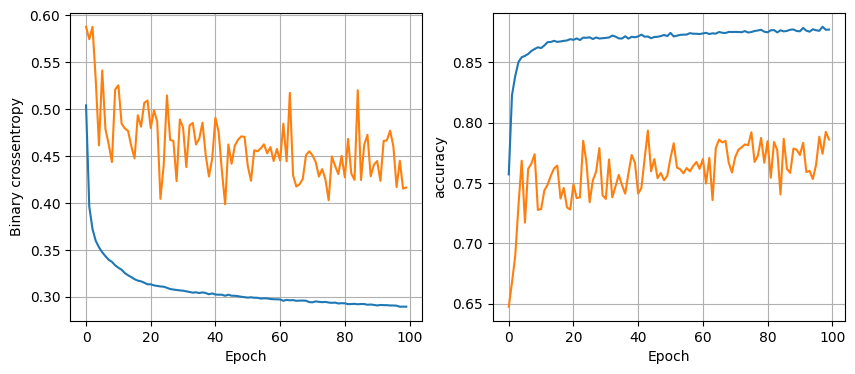

119/119 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8712
16 nodes , dropout 0 , learning rate 0.001 , batch size 64


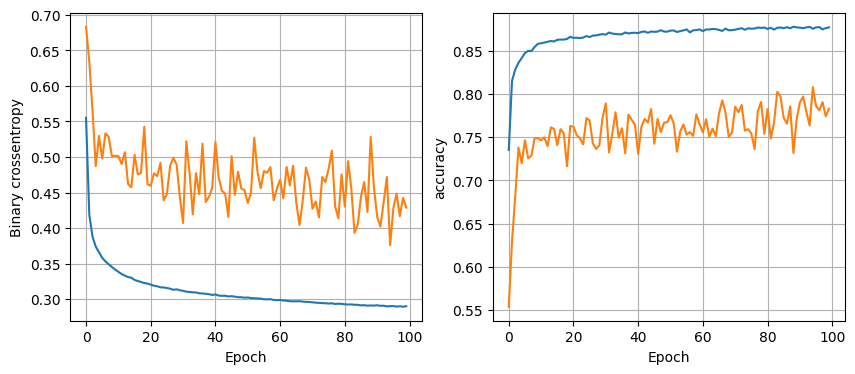

119/119 [==============================] - 0s 931us/step - loss: 0.2928 - accuracy: 0.8778
16 nodes , dropout 0 , learning rate 0.001 , batch size 128


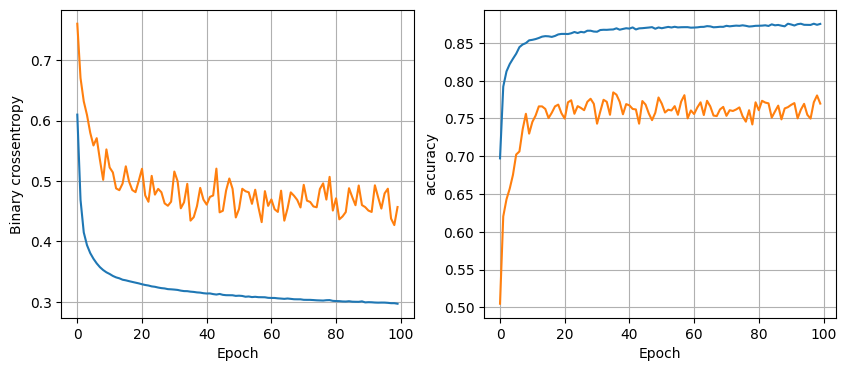

119/119 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8785
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


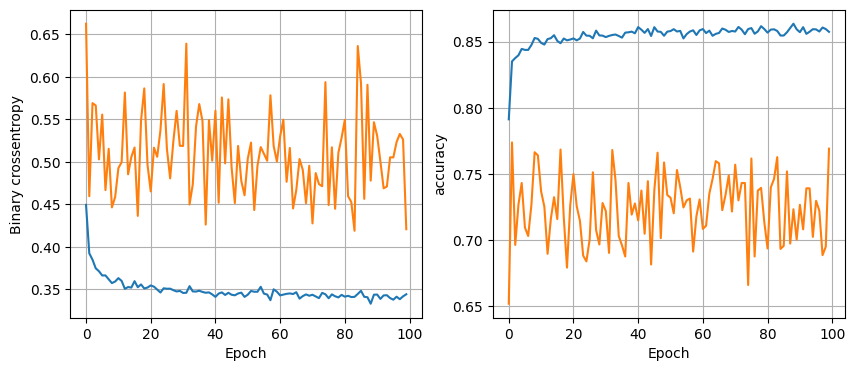

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8767
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


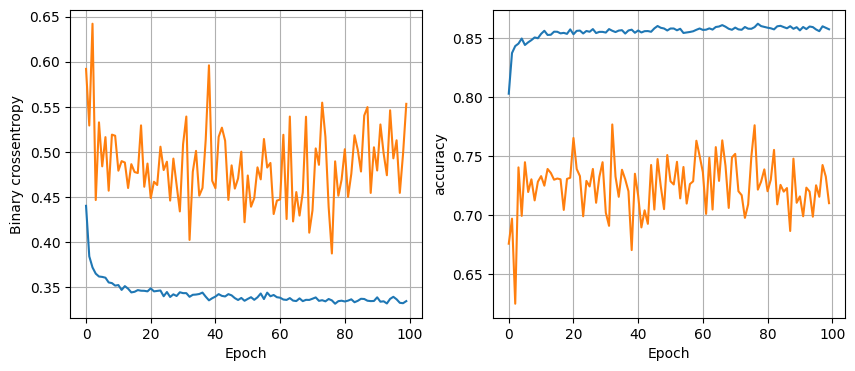

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8707
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


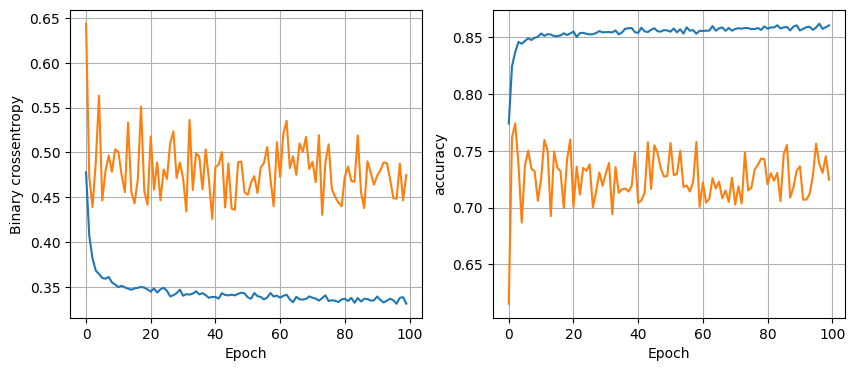

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8741
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


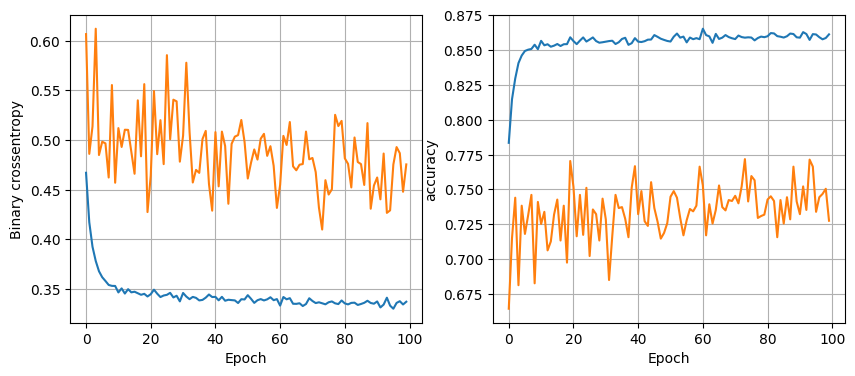

119/119 [==============================] - 0s 817us/step - loss: 0.3116 - accuracy: 0.8738
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


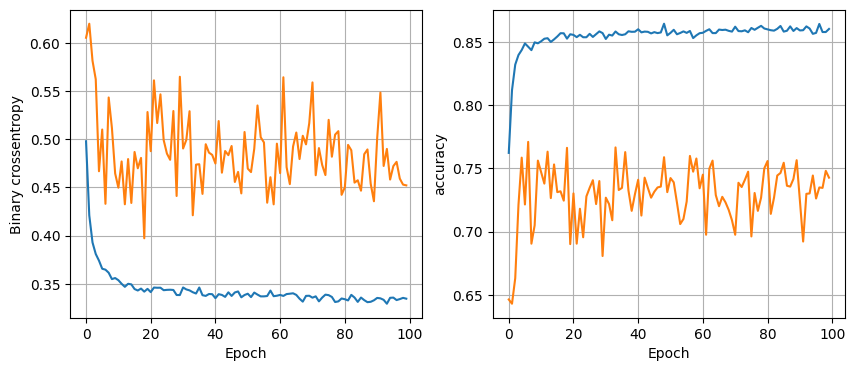

119/119 [==============================] - 0s 835us/step - loss: 0.3118 - accuracy: 0.8728
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


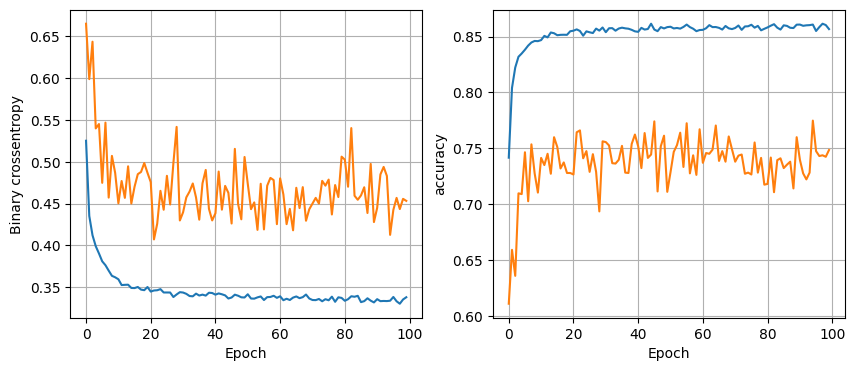

119/119 [==============================] - 0s 786us/step - loss: 0.3059 - accuracy: 0.8733
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


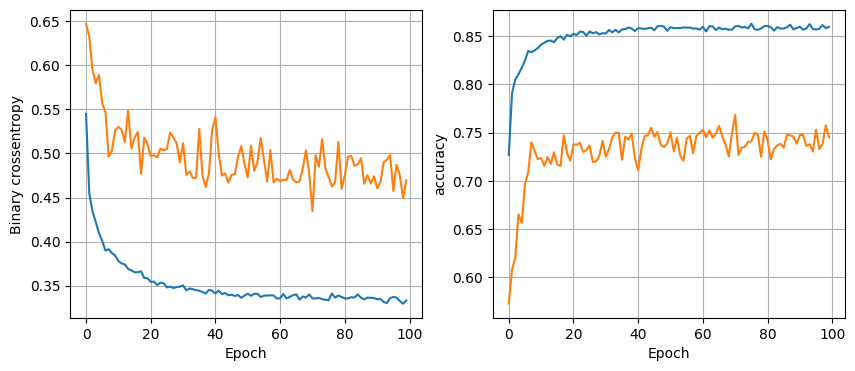

119/119 [==============================] - 0s 718us/step - loss: 0.3082 - accuracy: 0.8751
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


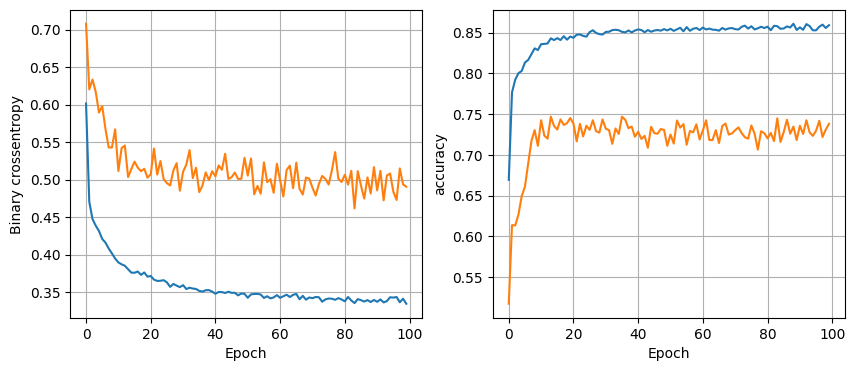

119/119 [==============================] - 0s 854us/step - loss: 0.3071 - accuracy: 0.8741
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


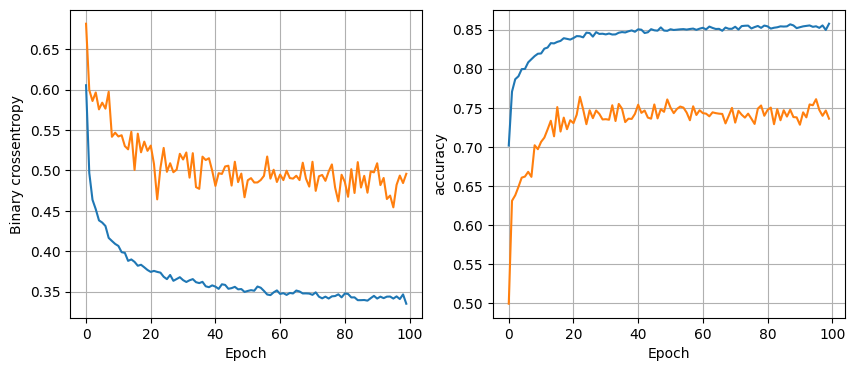

119/119 [==============================] - 0s 842us/step - loss: 0.3129 - accuracy: 0.8704
32 nodes , dropout 0 , learning rate 0.01 , batch size 32


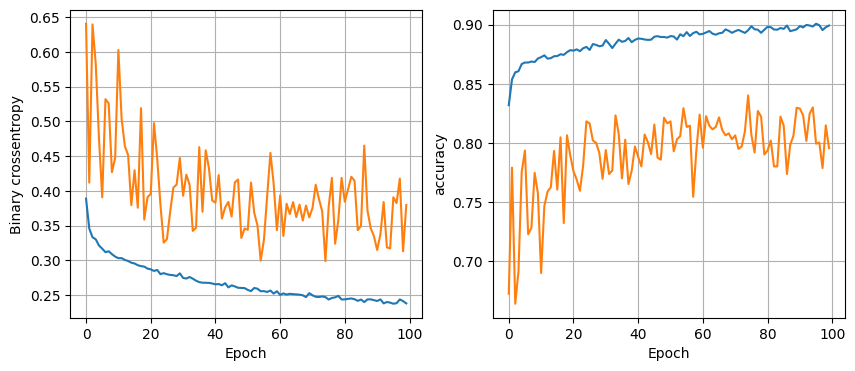

119/119 [==============================] - 0s 862us/step - loss: 0.3651 - accuracy: 0.8651
32 nodes , dropout 0 , learning rate 0.01 , batch size 64


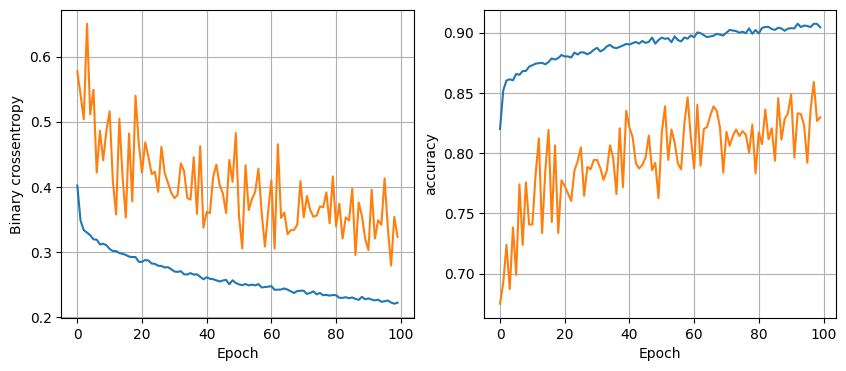

119/119 [==============================] - 0s 757us/step - loss: 0.3475 - accuracy: 0.8667
32 nodes , dropout 0 , learning rate 0.01 , batch size 128


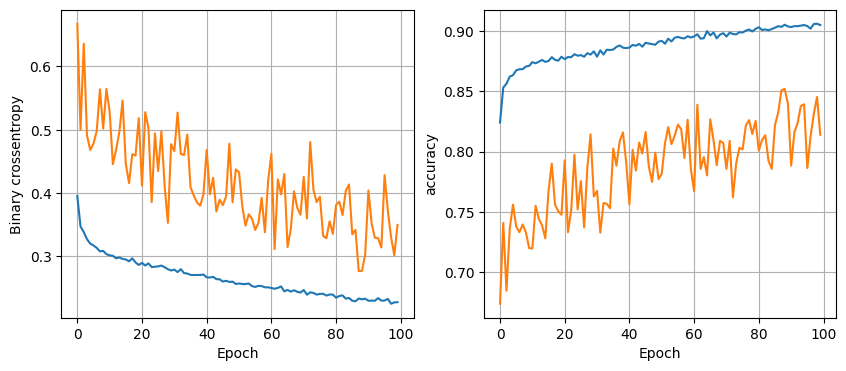

119/119 [==============================] - 0s 834us/step - loss: 0.3619 - accuracy: 0.8704
32 nodes , dropout 0 , learning rate 0.005 , batch size 32


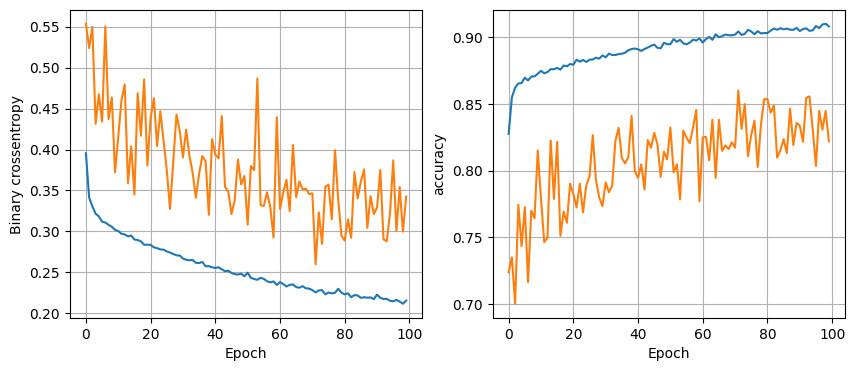

119/119 [==============================] - 0s 739us/step - loss: 0.3830 - accuracy: 0.8720
32 nodes , dropout 0 , learning rate 0.005 , batch size 64


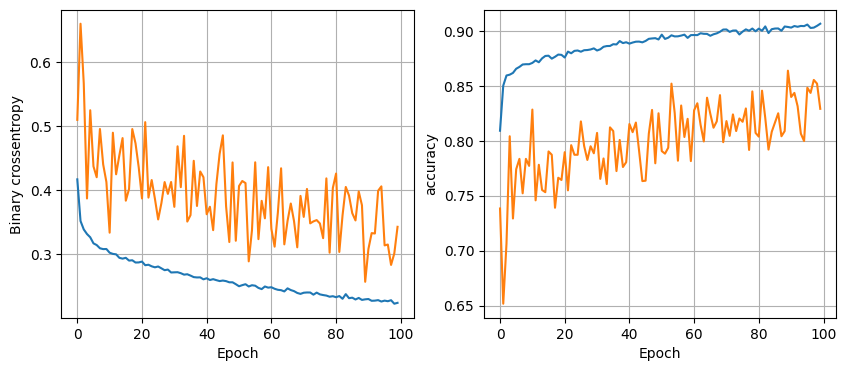

119/119 [==============================] - 0s 660us/step - loss: 0.3244 - accuracy: 0.8783
32 nodes , dropout 0 , learning rate 0.005 , batch size 128


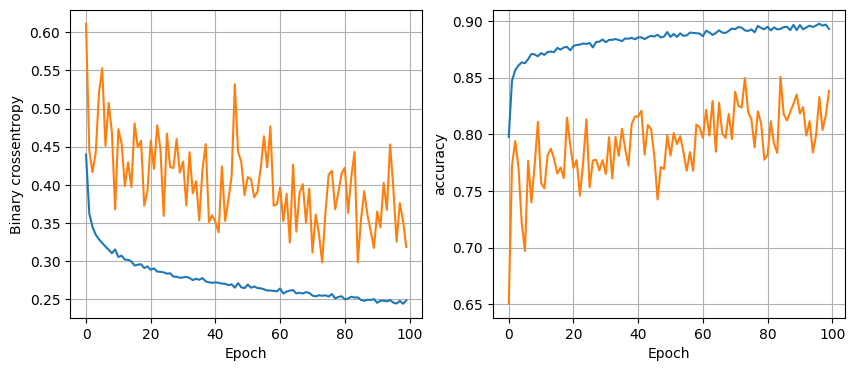

119/119 [==============================] - 0s 785us/step - loss: 0.3333 - accuracy: 0.8717
32 nodes , dropout 0 , learning rate 0.001 , batch size 32


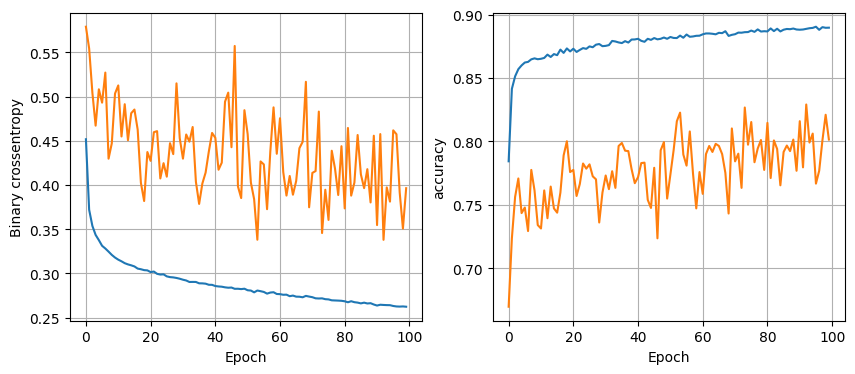

119/119 [==============================] - 0s 780us/step - loss: 0.3021 - accuracy: 0.8799
32 nodes , dropout 0 , learning rate 0.001 , batch size 64


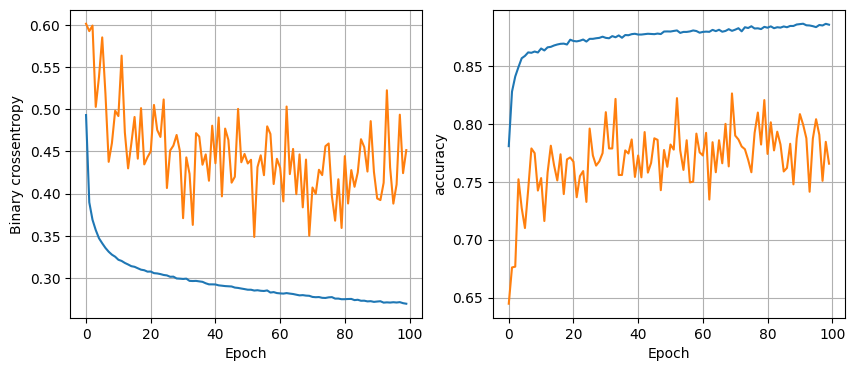

119/119 [==============================] - 0s 782us/step - loss: 0.2960 - accuracy: 0.8759
32 nodes , dropout 0 , learning rate 0.001 , batch size 128


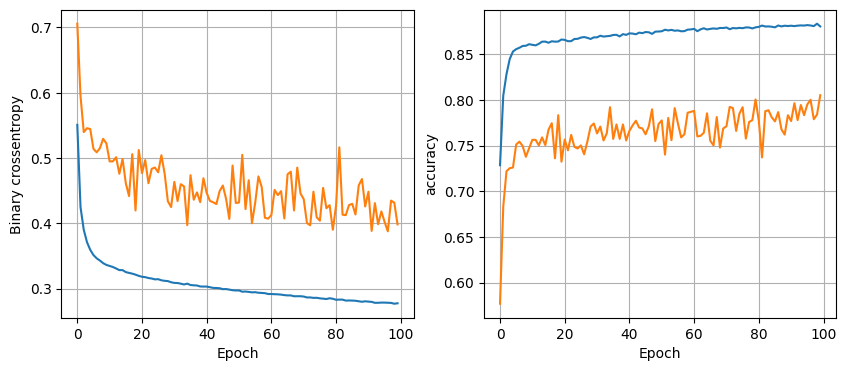

119/119 [==============================] - 0s 709us/step - loss: 0.2961 - accuracy: 0.8785
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


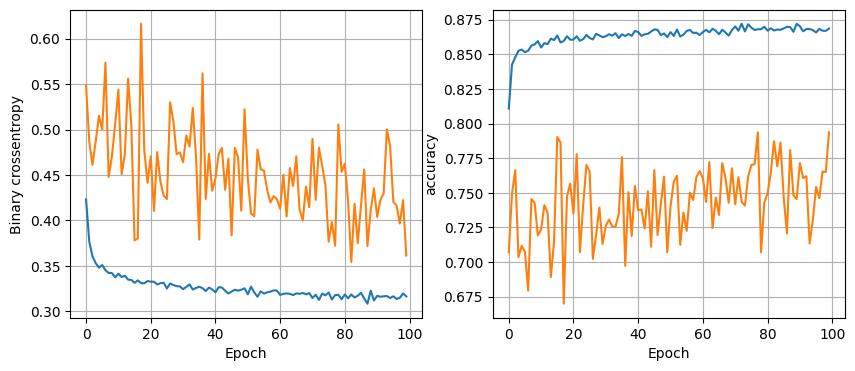

119/119 [==============================] - 0s 645us/step - loss: 0.3115 - accuracy: 0.8728
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


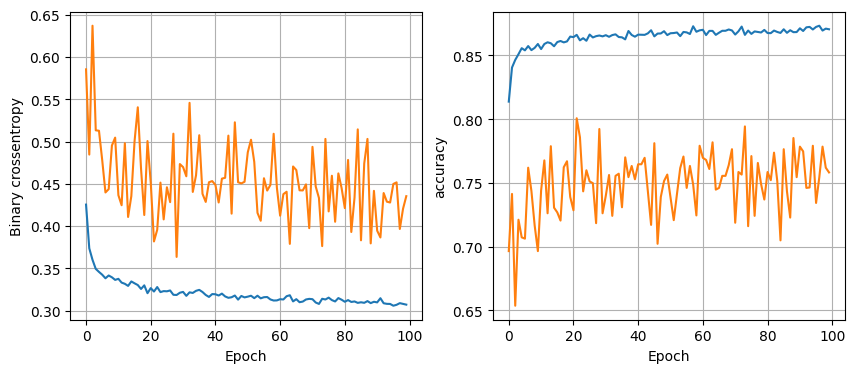

119/119 [==============================] - 0s 764us/step - loss: 0.2956 - accuracy: 0.8799
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


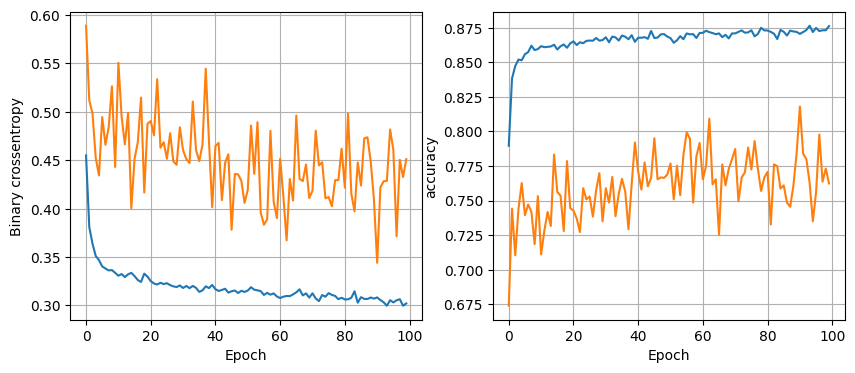

119/119 [==============================] - 0s 693us/step - loss: 0.2961 - accuracy: 0.8751
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


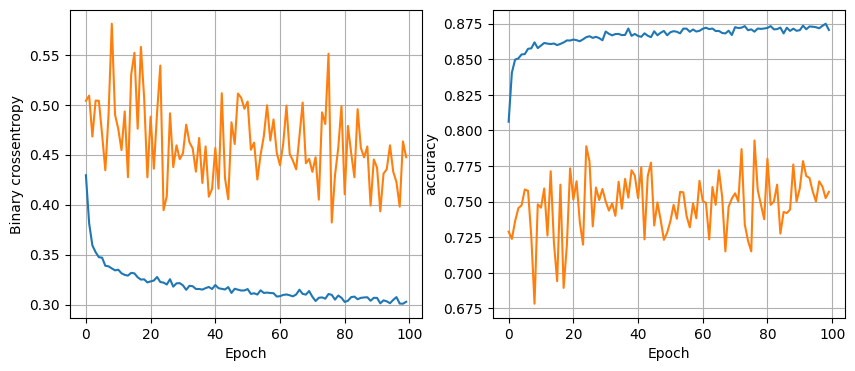

119/119 [==============================] - 0s 917us/step - loss: 0.2954 - accuracy: 0.8757
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


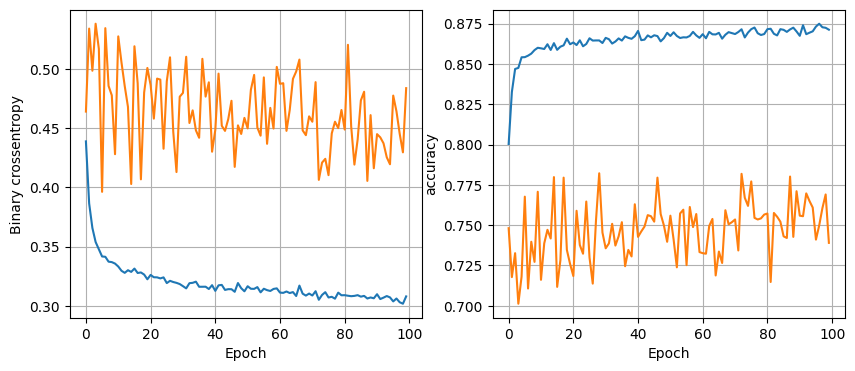

119/119 [==============================] - 0s 700us/step - loss: 0.2988 - accuracy: 0.8759
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


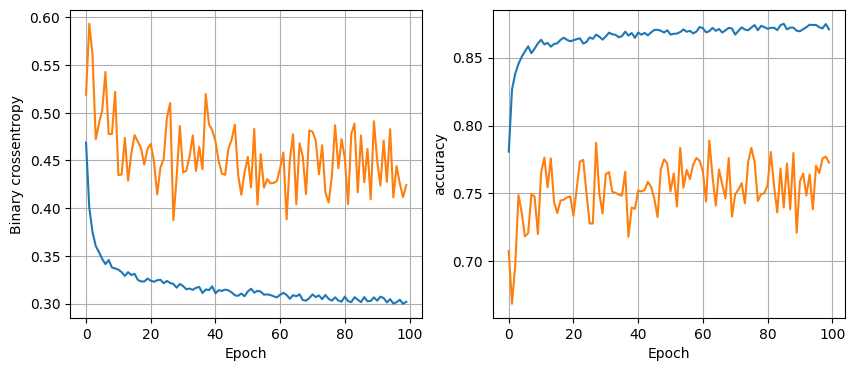

119/119 [==============================] - 0s 693us/step - loss: 0.2936 - accuracy: 0.8780
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


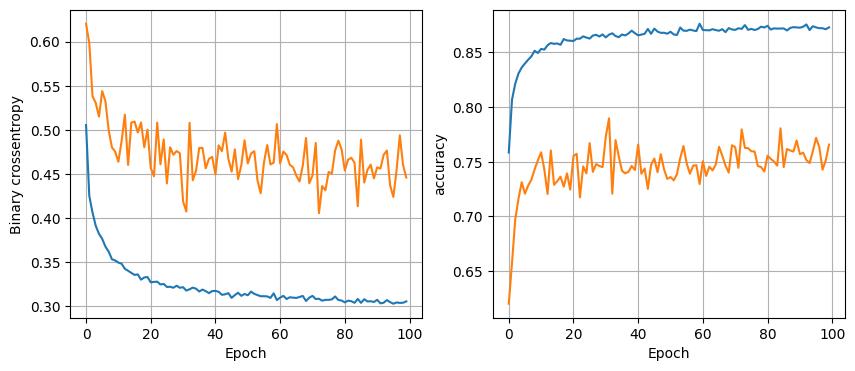

119/119 [==============================] - 0s 762us/step - loss: 0.2914 - accuracy: 0.8825
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


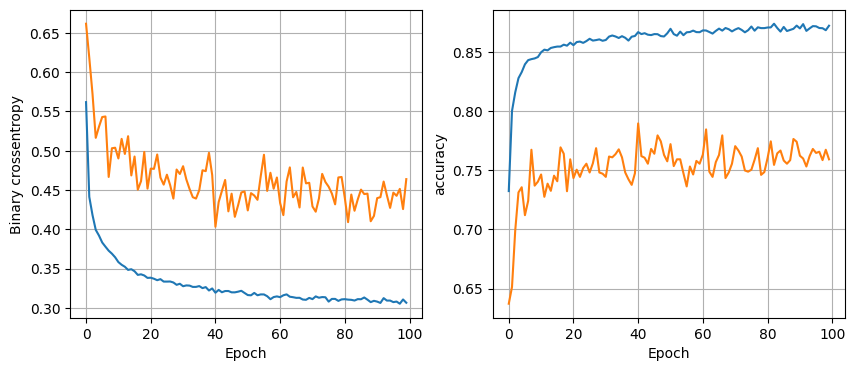

119/119 [==============================] - 0s 779us/step - loss: 0.2926 - accuracy: 0.8801
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


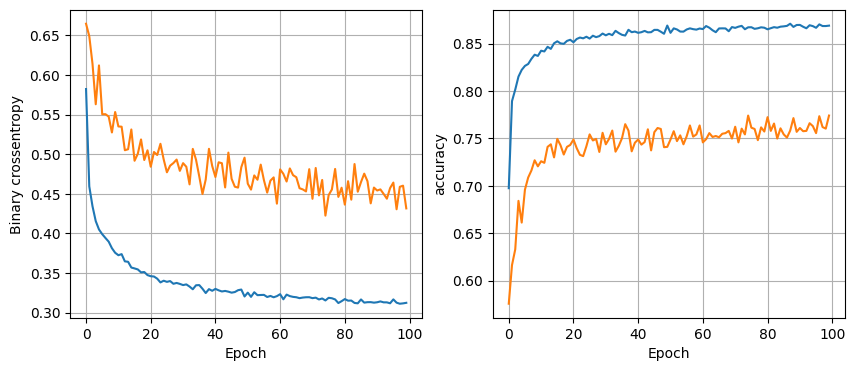

119/119 [==============================] - 0s 775us/step - loss: 0.2949 - accuracy: 0.8799
64 nodes , dropout 0 , learning rate 0.01 , batch size 32


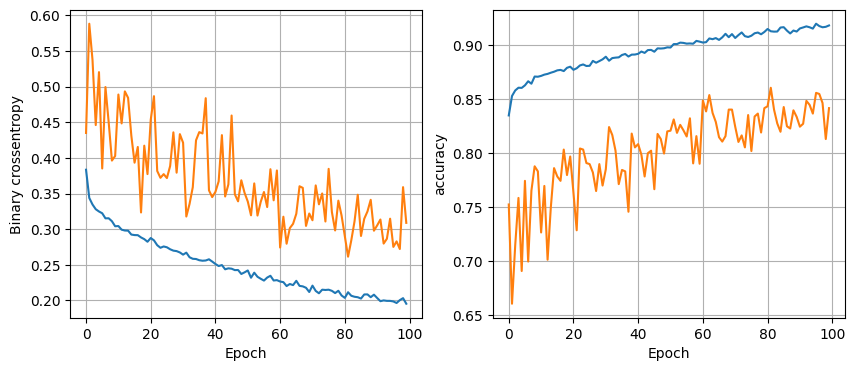

119/119 [==============================] - 0s 785us/step - loss: 0.4728 - accuracy: 0.8641
64 nodes , dropout 0 , learning rate 0.01 , batch size 64


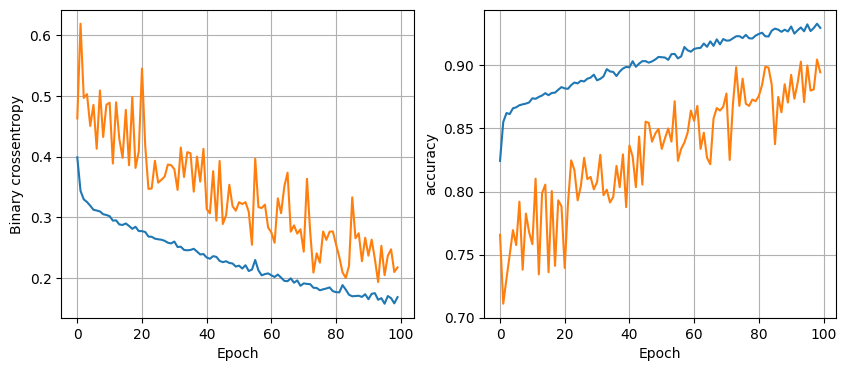

119/119 [==============================] - 0s 835us/step - loss: 0.5789 - accuracy: 0.8586
64 nodes , dropout 0 , learning rate 0.01 , batch size 128


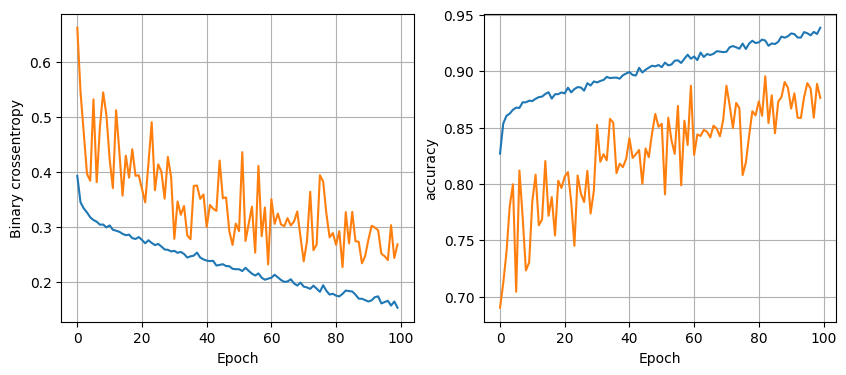

119/119 [==============================] - 0s 890us/step - loss: 0.4894 - accuracy: 0.8623
64 nodes , dropout 0 , learning rate 0.005 , batch size 32


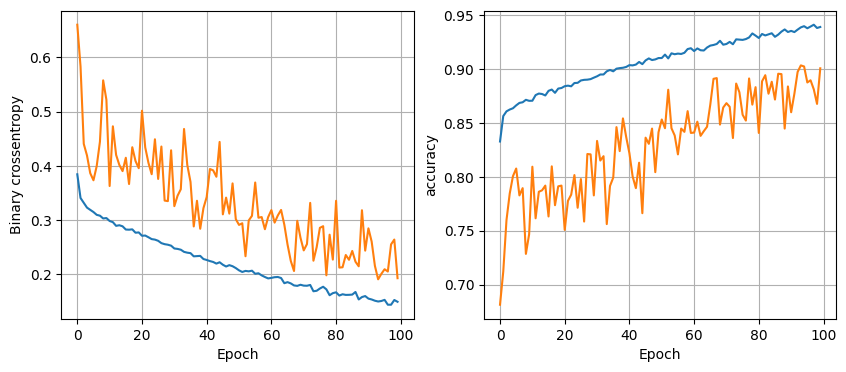

119/119 [==============================] - 0s 950us/step - loss: 0.5712 - accuracy: 0.8615
64 nodes , dropout 0 , learning rate 0.005 , batch size 64


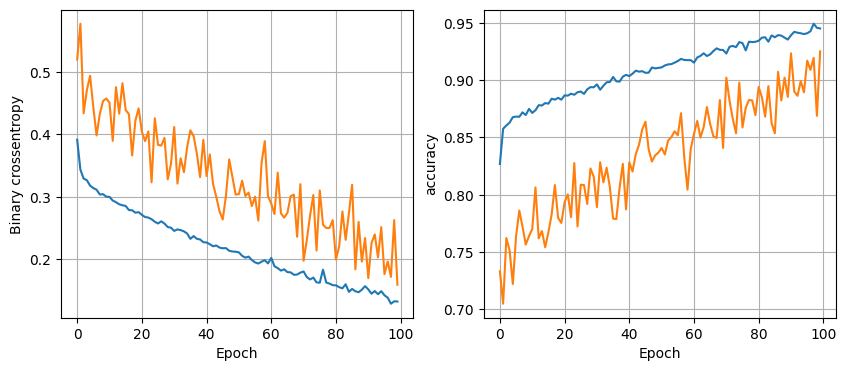

119/119 [==============================] - 0s 605us/step - loss: 0.5808 - accuracy: 0.8507
64 nodes , dropout 0 , learning rate 0.005 , batch size 128


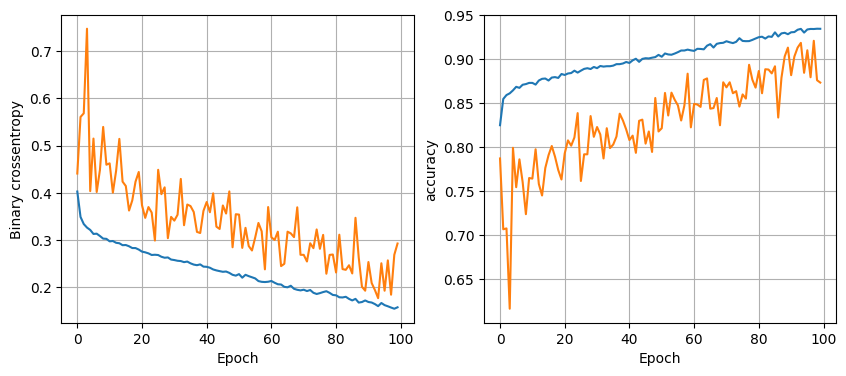

119/119 [==============================] - 0s 742us/step - loss: 0.4834 - accuracy: 0.8686
64 nodes , dropout 0 , learning rate 0.001 , batch size 32


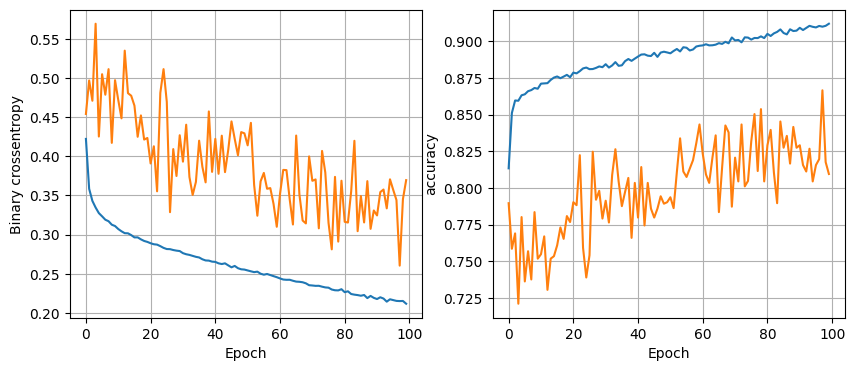

119/119 [==============================] - 0s 542us/step - loss: 0.3346 - accuracy: 0.8728
64 nodes , dropout 0 , learning rate 0.001 , batch size 64


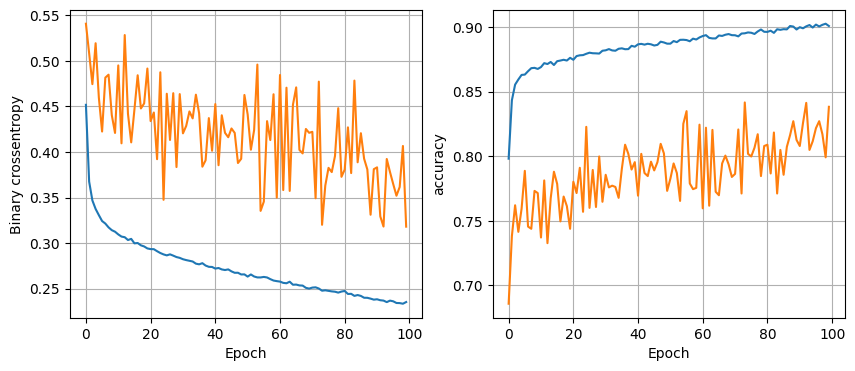

119/119 [==============================] - 0s 541us/step - loss: 0.3226 - accuracy: 0.8699
64 nodes , dropout 0 , learning rate 0.001 , batch size 128


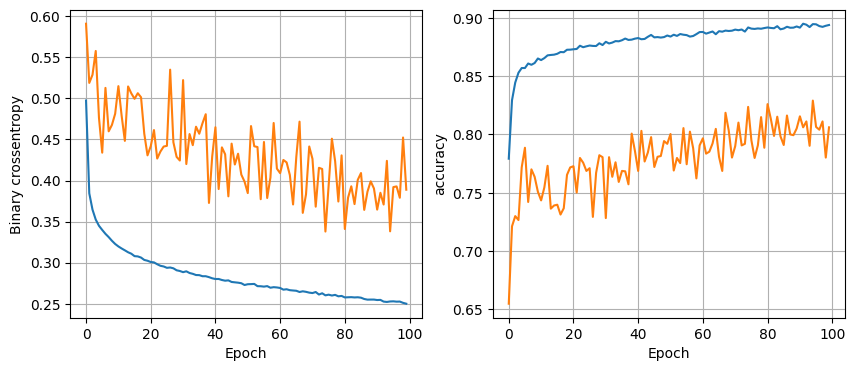

119/119 [==============================] - 0s 598us/step - loss: 0.2957 - accuracy: 0.8793
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


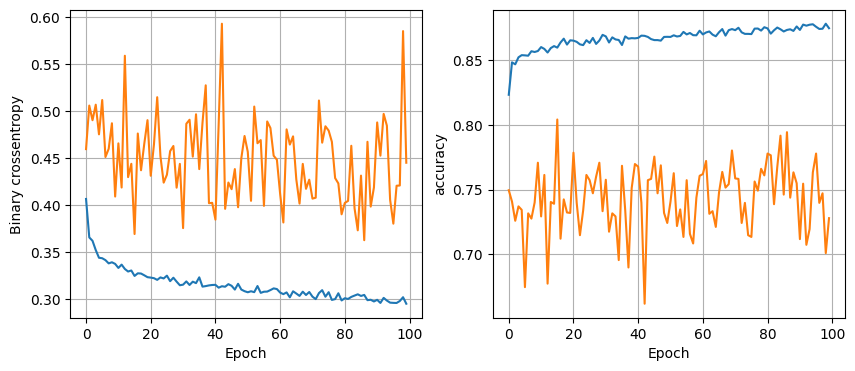

119/119 [==============================] - 0s 587us/step - loss: 0.2958 - accuracy: 0.8725
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


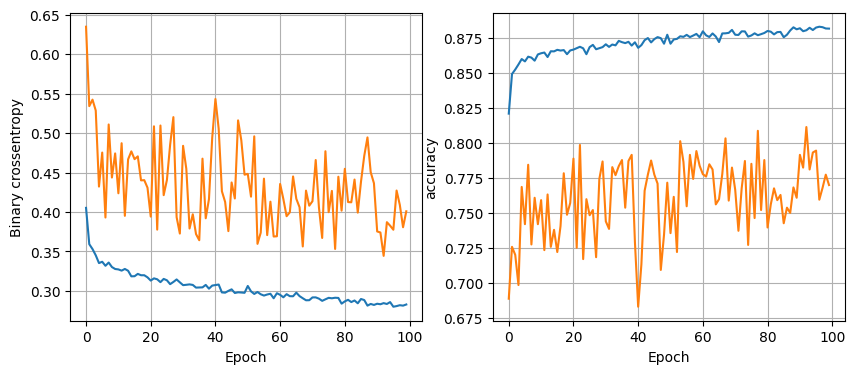

119/119 [==============================] - 0s 675us/step - loss: 0.3014 - accuracy: 0.8785
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


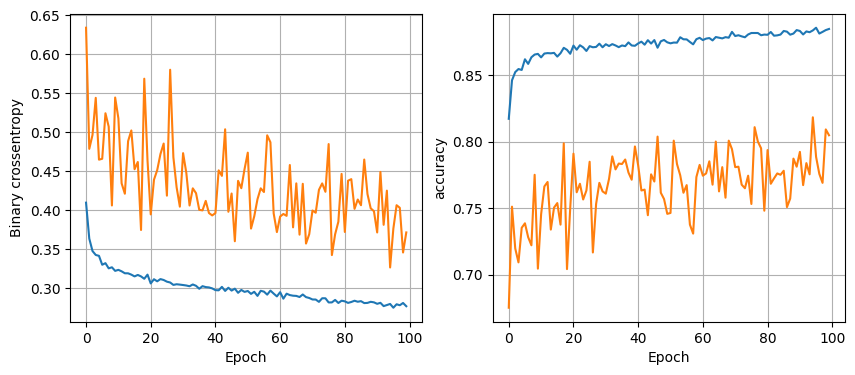

119/119 [==============================] - 0s 556us/step - loss: 0.2926 - accuracy: 0.8783
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


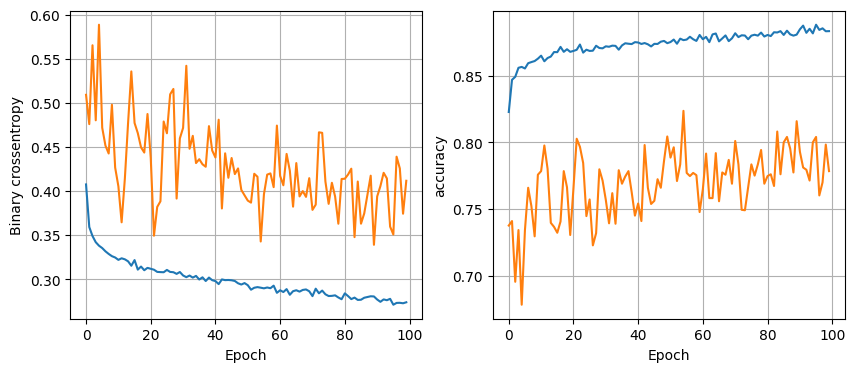

119/119 [==============================] - 0s 699us/step - loss: 0.2986 - accuracy: 0.8757
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


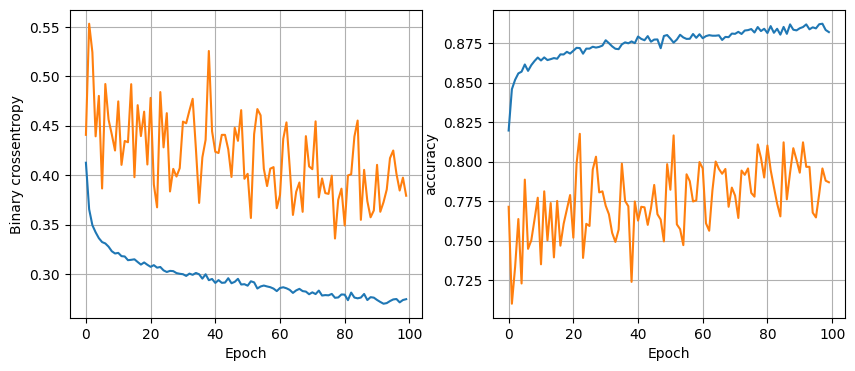

119/119 [==============================] - 0s 577us/step - loss: 0.2920 - accuracy: 0.8820
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


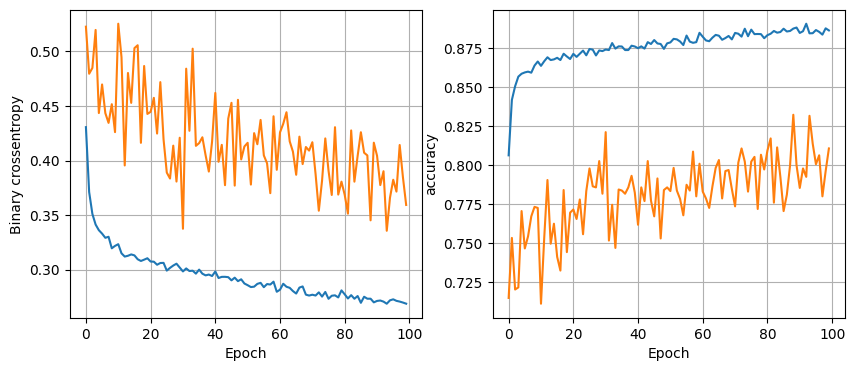

119/119 [==============================] - 0s 549us/step - loss: 0.2928 - accuracy: 0.8859
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


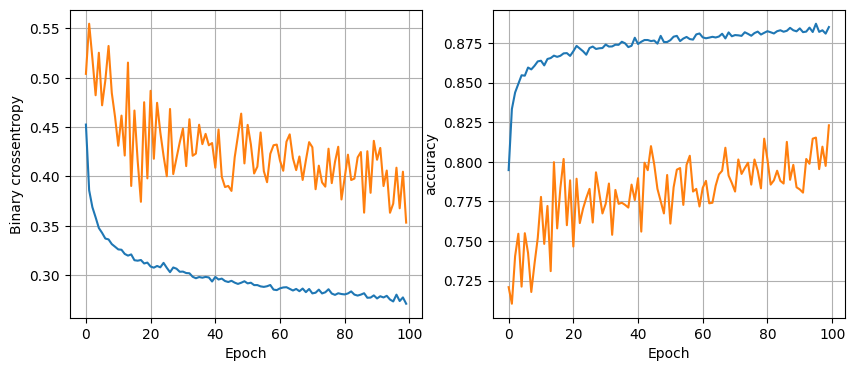

119/119 [==============================] - 0s 562us/step - loss: 0.2952 - accuracy: 0.8767
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


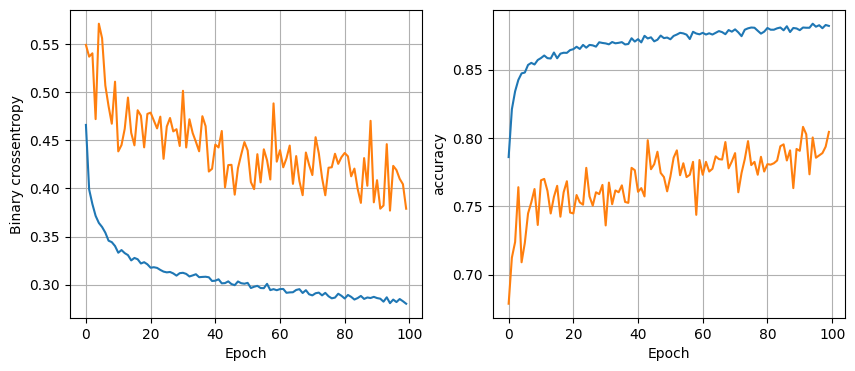

119/119 [==============================] - 0s 561us/step - loss: 0.2914 - accuracy: 0.8796
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


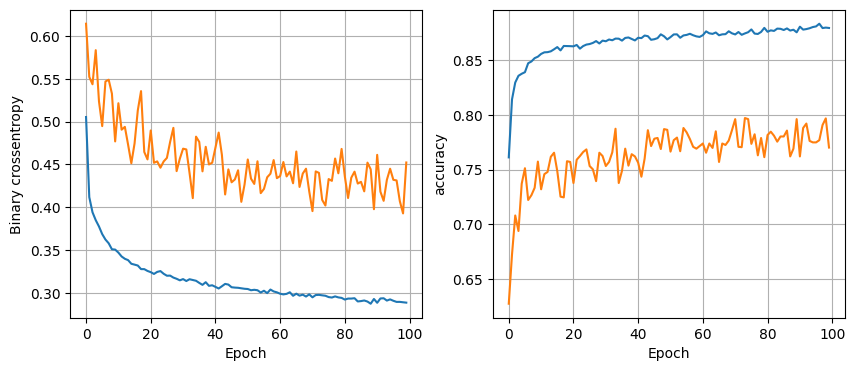

119/119 [==============================] - 0s 580us/step - loss: 0.2873 - accuracy: 0.8825


In [26]:
least_val_loss = float('inf')
least_loss_model = None
epochs =100

# Defining nodes
for num_nodes in [16,32,64]:
  
# Defining dropout for the nodes
    for dropout_prob in [0,0.2]:
        
# Defining Learning Rate for the model/optimizer        
        for lr in [0.01,0.005,0.001]:

# Defining Batch Size for the training
            for batch_size in [32,64,128]:
                
                print(f"{num_nodes} nodes , dropout {dropout_prob} , learning rate {lr} , batch size {batch_size}")
                model,history = train_model(X_train , y_train , num_nodes , dropout_prob , lr , batch_size , epochs)

                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)[0]
                val_accuracy = model.evaluate(X_valid,y_valid)[1]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model


Above are the loss and accuracy iterating for
1. nodes[16,32,64] 
2. dropout[0,0.2] 
3. for lr[0.01,0.005,0.001]
4. batch size[32,64,128]
for every 52 combinations

In [27]:
print("Least Validation Loss : {}".format(least_val_loss))
print("Validation accuracy of the model : {}".format(val_accuracy))
print(least_loss_model.summary())

Least Validation Loss : 0.2873251438140869
Validation accuracy of the model : 0.8824921250343323
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 64)                704       
                                                                 
 dropout_106 (Dropout)       (None, 64)                0         
                                                                 
 dense_160 (Dense)           (None, 64)                4160      
                                                                 
 dropout_107 (Dropout)       (None, 64)                0         
                                                                 
 dense_161 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
____________________

In [30]:
y_pred = least_loss_model.predict(X_test)

print(y_pred)

119/119 [==============================] - 0s 452us/step
[[9.0242869e-01]
 [3.4337889e-02]
 [9.9834633e-01]
 ...
 [8.5433024e-01]
 [6.4267719e-01]
 [5.3826032e-05]]


We have used SIGMOID activation for our output which provide the answer in the form of probaility between 0 to 1 <br>
Eg - <br>
[[9.0242869e-01]   → 0.90242869<br>
 [3.4337889e-02]   → 0.034337889<br>
 [9.9834633e-01]   → 0.99834633<br>
 ...<br>
 [8.5433024e-01]   → 0.85433024<br>
 [6.4267719e-01]   → 0.64267719<br>
 [5.3826032e-05]]  → 0.000053826032<br>

So we need to convert it to only 0 or 1 i.e. binary because our output in the data(y_test) is binary not the probability

In [33]:


#Converting the porbability of output to binary 1 & 0
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
print("Predicted values are {}".format(y_pred))


Predicted values are [1 0 1 ... 1 1 0]


y_pred < 0.5 then y_pred = 0<br>
y_pred > 0.5 then y_pred = 1

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1116
           1       0.95      0.86      0.90      2688

    accuracy                           0.87      3804
   macro avg       0.84      0.88      0.85      3804
weighted avg       0.88      0.87      0.87      3804

